In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<12:08:31> Checking library dependencies ...
<12:08:31> Using the following libraries (in addition to the Anaconda libraries):
<12:08:31> 	scipy (v0.18.0)
<12:08:31> 	statsmodels (v0.6.1)
<12:08:31> 	scikit-learn (v0.17.1)
<12:08:31> 	seaborn (v0.7.1)
<12:08:31> 	rpy2 (v2.8.2)
<12:08:31> 	pandas (v0.18.1)
<12:08:31> 	matplotlib (v1.5.1)
<12:08:31> 	numpy (v1.11.1)
<12:08:31> Planted a random seed 20121020.


# Define states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)
# labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
#                                                                              filepath_prefix=filepath_prefix)

# Make Onco-GPS

In [3]:
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

ccal.support.VERBOSE = False

for n_components in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
    #h = ccal.support.make_random_features(n_components, 100)
    h = h.iloc[:n_components, :]
    for n_state in range(1, 21, 5):
        for annotation_type in ['continuous', 'categorical', 'binary']:
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h,
                                   np.random.choice(list(range(n_state)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)#,
                                   #background_markersize=0, background_mask_markersize=0)

# Project samples

In [4]:
labels = filepath_prefix + '_labels.txt'
state = 12

if os.path.isfile(labels):
    labels = pd.read_csv(labels, index_col=0, sep='\t')
    labels.drop('cophenetic_correlation', axis=1, inplace=True)
    
states = labels.ix[state, :]

ccal.onco_gps.make_map(h, states, background_markersize=0, background_mask_markersize=0)

ccal.onco_gps.make_map(h, states, h_test=h, h_test_normalization='b', states_test=states, background_markersize=0, background_mask_markersize=0)

In [5]:
h_test = h.ix[:, :3]

In [6]:
states_test = states[: 3]

ccal.onco_gps.make_map(h, states, h_test=h_test, states_test=states_test, h_test_normalization='a', background_markersize=0, background_mask_markersize=0)

# Test real data

In [7]:
H = ccal.support.read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')

MEMBERSHIPS = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t', index_col=0)
K17_MEMBERSHIPS = MEMBERSHIPS.ix[:, 'k_17']
K17_MEMBERSHIPS_INT = K17_MEMBERSHIPS.apply(lambda s: int(s[1:])).tolist()

VARIANTS = ccal.support.read_gct('/home/cyborg/data/ccle/ccle_mut_cna.gct')
KRAS_VARIANTS = VARIANTS.ix['KRAS_MUT', :]

KRAS_SAMPLES = KRAS_VARIANTS.ix[KRAS_VARIANTS == 1].index
H_KRAS = H.ix[:, KRAS_SAMPLES & H.columns]
KRAS_VARIANTS_IN_H = KRAS_VARIANTS.ix[H_KRAS.columns]

K17_MEMNERSHIPS_KRAS = K17_MEMBERSHIPS.ix[H_KRAS.columns]
K17_MEMNERSHIPS_KRAS_INT = K17_MEMNERSHIPS_KRAS.apply(lambda s: int(s[1:])).tolist()

ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT)

ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, h_test=H_KRAS, states_test=K17_MEMNERSHIPS_KRAS_INT)

<12:08:35> Making Onco-GPS with 9 components, 750 samples, and 17 states: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] ...
<12:08:35> '-0-' normalizing pandas object with axis=1 ...
<12:08:35> '0-1' normalizing pandas object with axis=1 ...
<12:08:36> Converting association to distance (1 - association) ...
<12:08:39> '0-1' normalizing pandas object with axis=0 ...
<12:08:39> Modeled columns by 0.009092682289656087e^(0.5530317148959037x) + 0.018927689355700078.
<12:08:39> component_pulling_power = 2.106.
<12:08:40> Using samples from testing H matrix ...
<12:08:53> '-0-' normalizing pandas object with axis=all ...
<12:08:53> Warning: tried to '-0-' normalize but the standard deviation is 0.


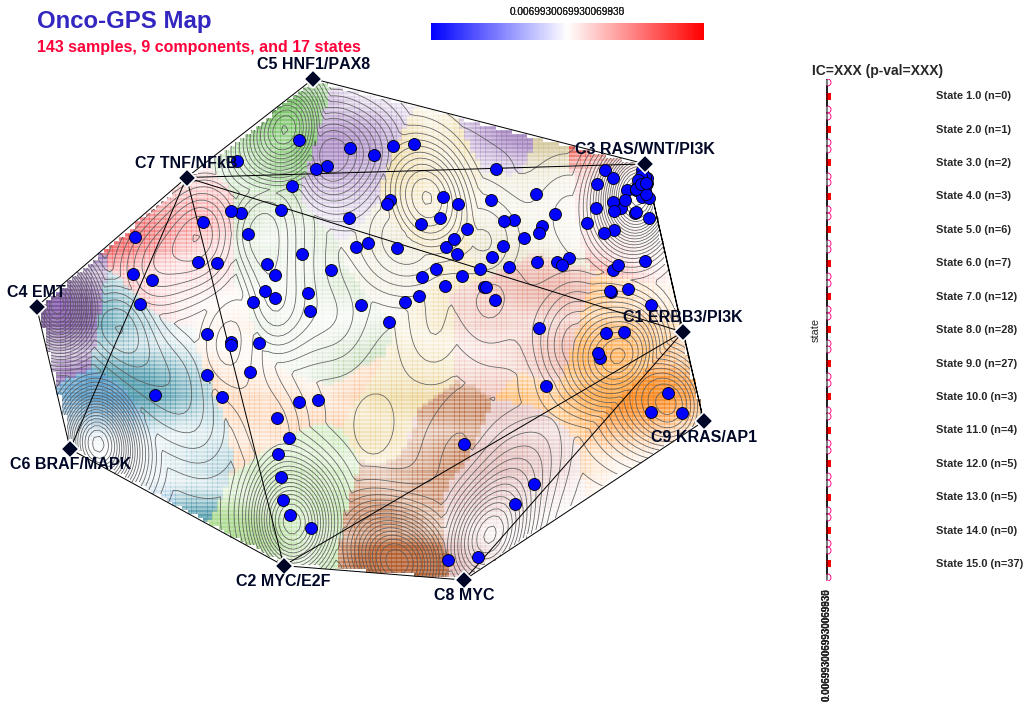

In [8]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, h_test=H_KRAS, states_test=K17_MEMNERSHIPS_KRAS_INT, annotations=KRAS_VARIANTS_IN_H, annotation_type='continuous')

In [9]:
ccal.support.normalize_pandas_object(KRAS_VARIANTS_IN_H)

<12:09:03> '-0-' normalizing pandas object with axis=all ...
<12:09:03> Warning: tried to '-0-' normalize but the standard deviation is 0.


A549_LUNG                        0.006993
AGS_STOMACH                      0.006993
ASPC1_PANCREAS                   0.006993
CAL62_THYROID                    0.006993
CALU1_LUNG                       0.006993
CALU6_LUNG                       0.006993
CAPAN1_PANCREAS                  0.006993
CAPAN2_PANCREAS                  0.006993
CFPAC1_PANCREAS                  0.006993
CL11_LARGE_INTESTINE             0.006993
CL40_LARGE_INTESTINE             0.006993
COLO668_LUNG                     0.006993
COLO678_LARGE_INTESTINE          0.006993
CORL23_LUNG                      0.006993
CW2_LARGE_INTESTINE              0.006993
DANG_PANCREAS                    0.006993
DV90_LUNG                        0.006993
GP2D_LARGE_INTESTINE             0.006993
GSU_STOMACH                      0.006993
HCC1171_LUNG                     0.006993
HCC44_LUNG                       0.006993
HCC56_LARGE_INTESTINE            0.006993
HCT116_LARGE_INTESTINE           0.006993
HCT15_LARGE_INTESTINE            0

In [10]:
H.size

6750